<a href="https://colab.research.google.com/github/min02choi/Data-Analysis-and-Applications/blob/master/Week12/decissiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**의사 결정트리 ID3 과정 연습해보기**

- 데이터 로딩
> 교재 예제에서 보았던 age, income, student, credit을 바탕으로 컴퓨터 구매여부 (class_buy_computer)를 예측하기 위한 데이터

In [4]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


- 학습에 필요 없는 열 제거
> 첫 번째 열인 RID는 의미 없는 인덱스 번호이므로 제거

In [5]:
pd_data = pd_data.drop("RID", axis=1)

- 정보이득 함수 만들기: y값의 클래스를 기준으로 엔트로피 연산을 실시
> class_buys_computer가 yes인 경우와 no인 경우로 나눠서 연산

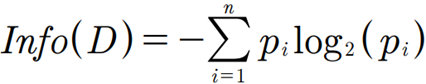

In [6]:
def get_info(df):
    buy = df.loc[df["class_buys_computer"] == "yes"]
    not_buy = df.loc[df["class_buys_computer"] == "no"]
    x = np.array([len(buy)/len(df), len(not_buy)/len(df)])
    y = np.log2(x[x != 0])

    info_all = - sum(x[x != 0] * y)
    return info_all

In [7]:
get_info(pd_data)

0.9402859586706311

- 속성별 정보 이득률 구하기
> 각 속성들의 클래스를 기준으로 데이터를 추출한 후 정보 이득을 산출

In [8]:
youth = pd_data.loc[pd_data['age'] == "youth"]
senior = pd_data.loc[pd_data['age'] == "senior"]
middle_aged = pd_data.loc[pd_data['age'] == "middle_aged"]

In [9]:
youth

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


> **age** 속성을 사용해서 분할 했을 때, youth 클래스에만 해당하는 정보이득



In [10]:
get_info(youth)

0.9709505944546686

> **age** 속성을 사용해서 분할 했을 때, senior 클래스에만 해당하는 정보이득

In [11]:
get_info(senior)

0.9709505944546686

> **age** 속성을 사용해서 분할 했을 때, middle_aged 클래스에만 해당하는 정보이득

In [12]:
get_info(middle_aged)

-0.0

> **age** 속성의 클래스 항목을 확인하는 방법

In [13]:
pd_data["age"]

0           youth
1           youth
2     middle_aged
3          senior
4          senior
5          senior
6     middle_aged
7           youth
8           youth
9          senior
10          youth
11    middle_aged
12    middle_aged
13         senior
Name: age, dtype: object

> unique 함수는 값이 중복되지 않게 리스트를 반환한다.

In [14]:
pd_data["age"].unique()

array(['youth', 'middle_aged', 'senior'], dtype=object)

- 자동으로 속성별 정보 이득 연산하기
> **age** 속성의 클래스 항목들에 대해서 정보이득을 구함

In [15]:
attribute_values = pd_data["age"].unique()

for value in attribute_values:
    split_df = pd_data.loc[pd_data["age"] == value]
    print(value, get_info(split_df))

youth 0.9709505944546686
middle_aged -0.0
senior 0.9709505944546686


 > DataFrame (df)의 속성 (attribute_name)의 각 클래스 항목에 대해서 정보이득을 구한 이후에 개수에 따른 **가중 평균**을 구함.

In [16]:
def get_attribute_info(df, attribute_name):

    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = df.loc[pd_data[attribute_name] == value]
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))

    return sum(get_infos)

In [17]:
get_attribute_info(pd_data, "age")

0.6935361388961918

- 정보 이득 계산하기
> 전체 데이터 대비 각각의 속성 데이터를 분리하여 계산

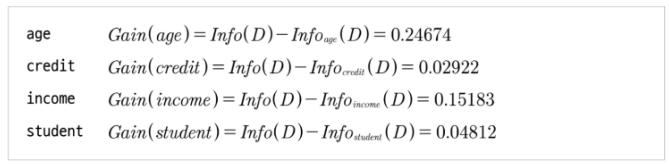

In [18]:
get_info(pd_data) - get_attribute_info(pd_data, "age")

0.24674981977443933

In [19]:
get_info(pd_data) - get_attribute_info(pd_data, "income")

0.02922256565895487

In [20]:
get_info(pd_data) - get_attribute_info(pd_data, "student")

0.15183550136234159

In [21]:
get_info(pd_data) - get_attribute_info(pd_data, "credit_rating")

0.04812703040826949

- 정보 이득이 가장 큰 age 속성값을 기준으로 의사결정트리 가지를 생성
> 가지 생성을 재귀적으로 수행함


In [22]:
youth = pd_data.loc[pd_data['age'] == "youth"]
get_info(youth)

0.9709505944546686

In [23]:
youth

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


In [27]:
get_info(youth) - get_attribute_info(youth, "income")

0.5709505944546686

In [25]:
get_info(youth) - get_attribute_info(youth, "student")

0.9709505944546686

In [26]:
get_info(youth) - get_attribute_info(youth, "credit_rating")

0.01997309402197489


> 정보이득이 가장 큰 student가 다음 분기를 위한 속성으로 사용

> 이러한 일련의 과정을 재귀적으로 수행하는 알고리즘 구현의 문제는 "자료구조"와 "알고리즘" 기반 이해가 필요

**사이킷런으로 의사결정트리 구현하기**

- 데이터 불러오기

In [28]:
import pandas as pd

!gdown https://drive.google.com/uc?id=1xiSgJZ8iyWruHlQG_n71naMb-uigxfpF
!gdown https://drive.google.com/uc?id=1y9xrKsP6JQrIHYNd0NNVg2-4tNyu7WZl
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

all_df = train_df.append(test_df).set_index('PassengerId')

Downloading...
From: https://drive.google.com/uc?id=1xiSgJZ8iyWruHlQG_n71naMb-uigxfpF
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 84.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y9xrKsP6JQrIHYNd0NNVg2-4tNyu7WZl
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 145MB/s]


<ipython-input-28-be39606adbdd>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = train_df.append(test_df).set_index('PassengerId')


> 전처리를 위해서 train_id와 test_id를 하나로 합쳐서 사용한다.

> 전처리 후에 추후 다시 training set과 test set을 분리하기 위해서 PassengerId 속성 값을 기억해 놓는다.

In [29]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- 데이터 전처리
> 데이터를 코드화시키고 결측치를 채우기

In [30]:
all_df["Sex"] = all_df["Sex"].replace({"male": 0,"female": 1})

all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

> 성별은 이진 값을 가지므로 "male"을 0으로 "female"을 1로 변경한다.

> 나이 값의 빈칸의 값을 각 클래스 (Pclass)의 평균값으로 채운다.

In [31]:
all_df[200:300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
201,0.0,3,"Vande Walle, Mr. Nestor Cyriel",0,28.000000,0,0,345770,9.5000,NaN,S
202,0.0,3,"Sage, Mr. Frederick",0,24.816367,8,2,CA. 2343,69.5500,NaN,S
203,0.0,3,"Johanson, Mr. Jakob Alfred",0,34.000000,0,0,3101264,6.4958,NaN,S
204,0.0,3,"Youseff, Mr. Gerious",0,45.500000,0,0,2628,7.2250,NaN,C
205,1.0,3,"Cohen, Mr. Gurshon ""Gus""",0,18.000000,0,0,A/5 3540,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,1,"Lewy, Mr. Ervin G",0,39.159930,0,0,PC 17612,27.7208,NaN,C
297,0.0,3,"Hanna, Mr. Mansour",0,23.500000,0,0,2693,7.2292,NaN,C
298,0.0,1,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,S


> Cabin 속성은 NaN, 또는 짐 형태와 번호 (ex, C22, B60)가 나열되어있다.

> 따라서 NaN일 경우에는 0 (str이 아닐경우), 1개 이상일 경우에는 짐 개수를 입력으로 사용한다.

In [32]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)

In [33]:
all_df[200:300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
201,0.0,3,"Vande Walle, Mr. Nestor Cyriel",0,28.000000,0,0,345770,9.5000,NaN,S,0
202,0.0,3,"Sage, Mr. Frederick",0,24.816367,8,2,CA. 2343,69.5500,NaN,S,0
203,0.0,3,"Johanson, Mr. Jakob Alfred",0,34.000000,0,0,3101264,6.4958,NaN,S,0
204,0.0,3,"Youseff, Mr. Gerious",0,45.500000,0,0,2628,7.2250,NaN,C,0
205,1.0,3,"Cohen, Mr. Gurshon ""Gus""",0,18.000000,0,0,A/5 3540,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,1,"Lewy, Mr. Ervin G",0,39.159930,0,0,PC 17612,27.7208,NaN,C,0
297,0.0,3,"Hanna, Mr. Mansour",0,23.500000,0,0,2693,7.2292,NaN,C,0
298,0.0,1,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,S,2


> 이름에 있는 명칭 (Mrs, Ms, Mr, Miss, Master, Dr, Rev, Col)을 이용하여 사회적 지위 정보를 정리하여 새로운 열에 저장한다.

In [34]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [35]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [36]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,Mrs
5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1,0
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr


> 사용하지 않을 데이터를 삭제한다. (Embarked 승선 하지 않은 사람을 삭제 한다)

In [37]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [38]:
all_df = all_df.drop([62, 830])
train_id = np.delete(train_id, [62-1, 830-1])

In [39]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,


> 빈 데이터는 적당한 값 채운다.

In [40]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [41]:
all_df.groupby(["Pclass", "Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [42]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

> 짐의 형태에 따라 생존 여부가 달라질 수 있다고 가정하고 전처리 작업을 진행 (실험적인 검증이 필요)

In [43]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "None")

In [44]:
all_df["cabin_type"].value_counts()

None    1014
C         94
B         63
D         46
E         41
A         22
F         21
G          5
T          1
Name: cabin_type, dtype: int64

> 불필요하다고 생각하는 속성 (열)을 삭제한다.

In [45]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

> 결과값 속성 (종속변수)의 값은 별도로 추출하고, 삭제한다.

In [46]:
Y = all_df["Survived"]
del all_df["Survived"]

- 원핫인코딩과 스케일링
> 데이터를 원핫으로 변경 후 넘파이 배열로 변경

In [47]:
X_df = pd.get_dummies(all_df)
X = X_df.values

X_df.keys()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_A', 'cabin_type_B', 'cabin_type_C',
       'cabin_type_D', 'cabin_type_E', 'cabin_type_F', 'cabin_type_G',
       'cabin_type_None', 'cabin_type_T'],
      dtype='object')

> 학습데이터와 시험데이터를 다시 분리한다.

In [48]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]
Y_train = Y[:len(train_id)]
Y_test = Y[len(train_id):]

In [49]:
Y_train, Y_test

(PassengerId
 1      0.0
 2      1.0
 3      1.0
 4      1.0
 5      0.0
       ... 
 887    0.0
 888    1.0
 889    0.0
 890    1.0
 891    0.0
 Name: Survived, Length: 889, dtype: float64,
 PassengerId
 892    NaN
 893    NaN
 894    NaN
 895    NaN
 896    NaN
         ..
 1305   NaN
 1306   NaN
 1307   NaN
 1308   NaN
 1309   NaN
 Name: Survived, Length: 418, dtype: float64)

> 학습데이터에서 Scaling을 수행하고, 학습/시험 데이터에 적용해준다.

In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_train)

MinMaxScaler()

In [51]:
X_train, X_test

(array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  1.        , 38.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        ,  1.        , 26.        , ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 3.        ,  1.        , 24.81636727, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.        , 26.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        ,  0.        , 32.        , ...,  0.        ,
          1.        ,  0.        ]]),
 array([[ 3.        ,  0.        , 34.5       , ...,  0.        ,
          1.        ,  0.        ],
        [ 3.        ,  1.        , 47.        , ...,  0.        ,
          1.        ,  0.        ],
        [ 2.        ,  0.        , 62.        , ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 3.        ,  0.        , 38.5       , ...,  

In [52]:
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [53]:
X_train, X_test

(array([[1.        , 0.        , 0.27117366, ..., 0.        , 1.        ,
         0.        ],
        [0.        , 1.        , 0.4722292 , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 1.        , 0.32143755, ..., 0.        , 1.        ,
         0.        ],
        ...,
        [1.        , 1.        , 0.30656405, ..., 0.        , 1.        ,
         0.        ],
        [0.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.39683338, ..., 0.        , 1.        ,
         0.        ]]),
 array([[1.        , 0.        , 0.4282483 , ..., 0.        , 1.        ,
         0.        ],
        [1.        , 1.        , 0.58532295, ..., 0.        , 1.        ,
         0.        ],
        [0.5       , 0.        , 0.77381252, ..., 0.        , 1.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.47851219, ..., 0.        , 1.        ,
         0.        ],
        [1. 

- 학습 실행하기

주요 하이퍼 매개변수

- **criterion** : [“gini”, “entropy”] : 지니 지수를 기준으로 나눌지, 정보 이득을 기준으로 나눌지 지정
- **max_depth** : int : 트리의 깊이를 지정
- **min_samples_leaf** : int or float : 마지막 노드의 최소 데이터의 개수를 지정 (int는 데이터의 개수, float는 전체 데이터에서의 비율)

> 마지막 노드의 개수 (min_samples_leaf) 개수를 조정하여 가지치기를 실시하고자 한다.

- 교차 검증 (cross_val_score)

> N-fold cross validation

> N = 5 예제

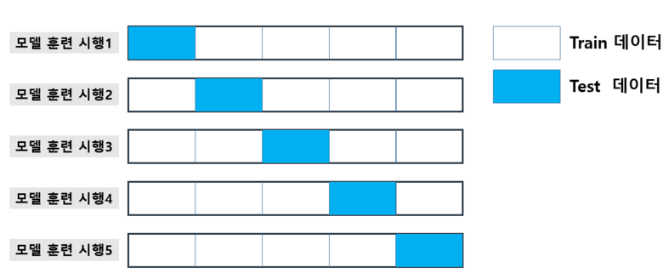

<Axes: >

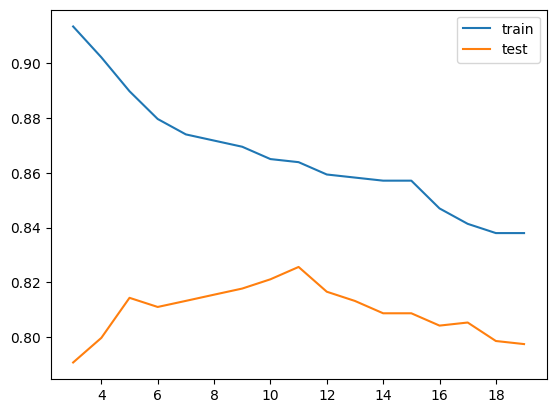

In [55]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    dt = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(dt, X_train, Y_train, scoring="accuracy", cv=5).mean()
    train_accuracy.append(accuracy_score(dt.fit(X_train, Y_train).predict(X_train), Y_train))
    test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy, index=range(3, 20), columns=["train"])
result["test"] = test_accuracy

result.plot()

> test 데이터셋의 정확성은 11에서 가장 높았다가 계속 떨어짐

> 의사결정트리의 경우 마지막 노드의 데이터 개수가 적으면 적을수록 과대적합이 발생

- 의사결정트리 시각화하기

> 의사결정트리는 데이터 분석가에게 어떤 피쳐가 가장 중요한지를 보여줌

> 하나의 노드를 기준으로 어떤 속성에 대해서 어떤 기준으로 가지가 발생했는지, 각 가지마다 데이터의 개수가 어떻게 나누어지는지 확인 가능

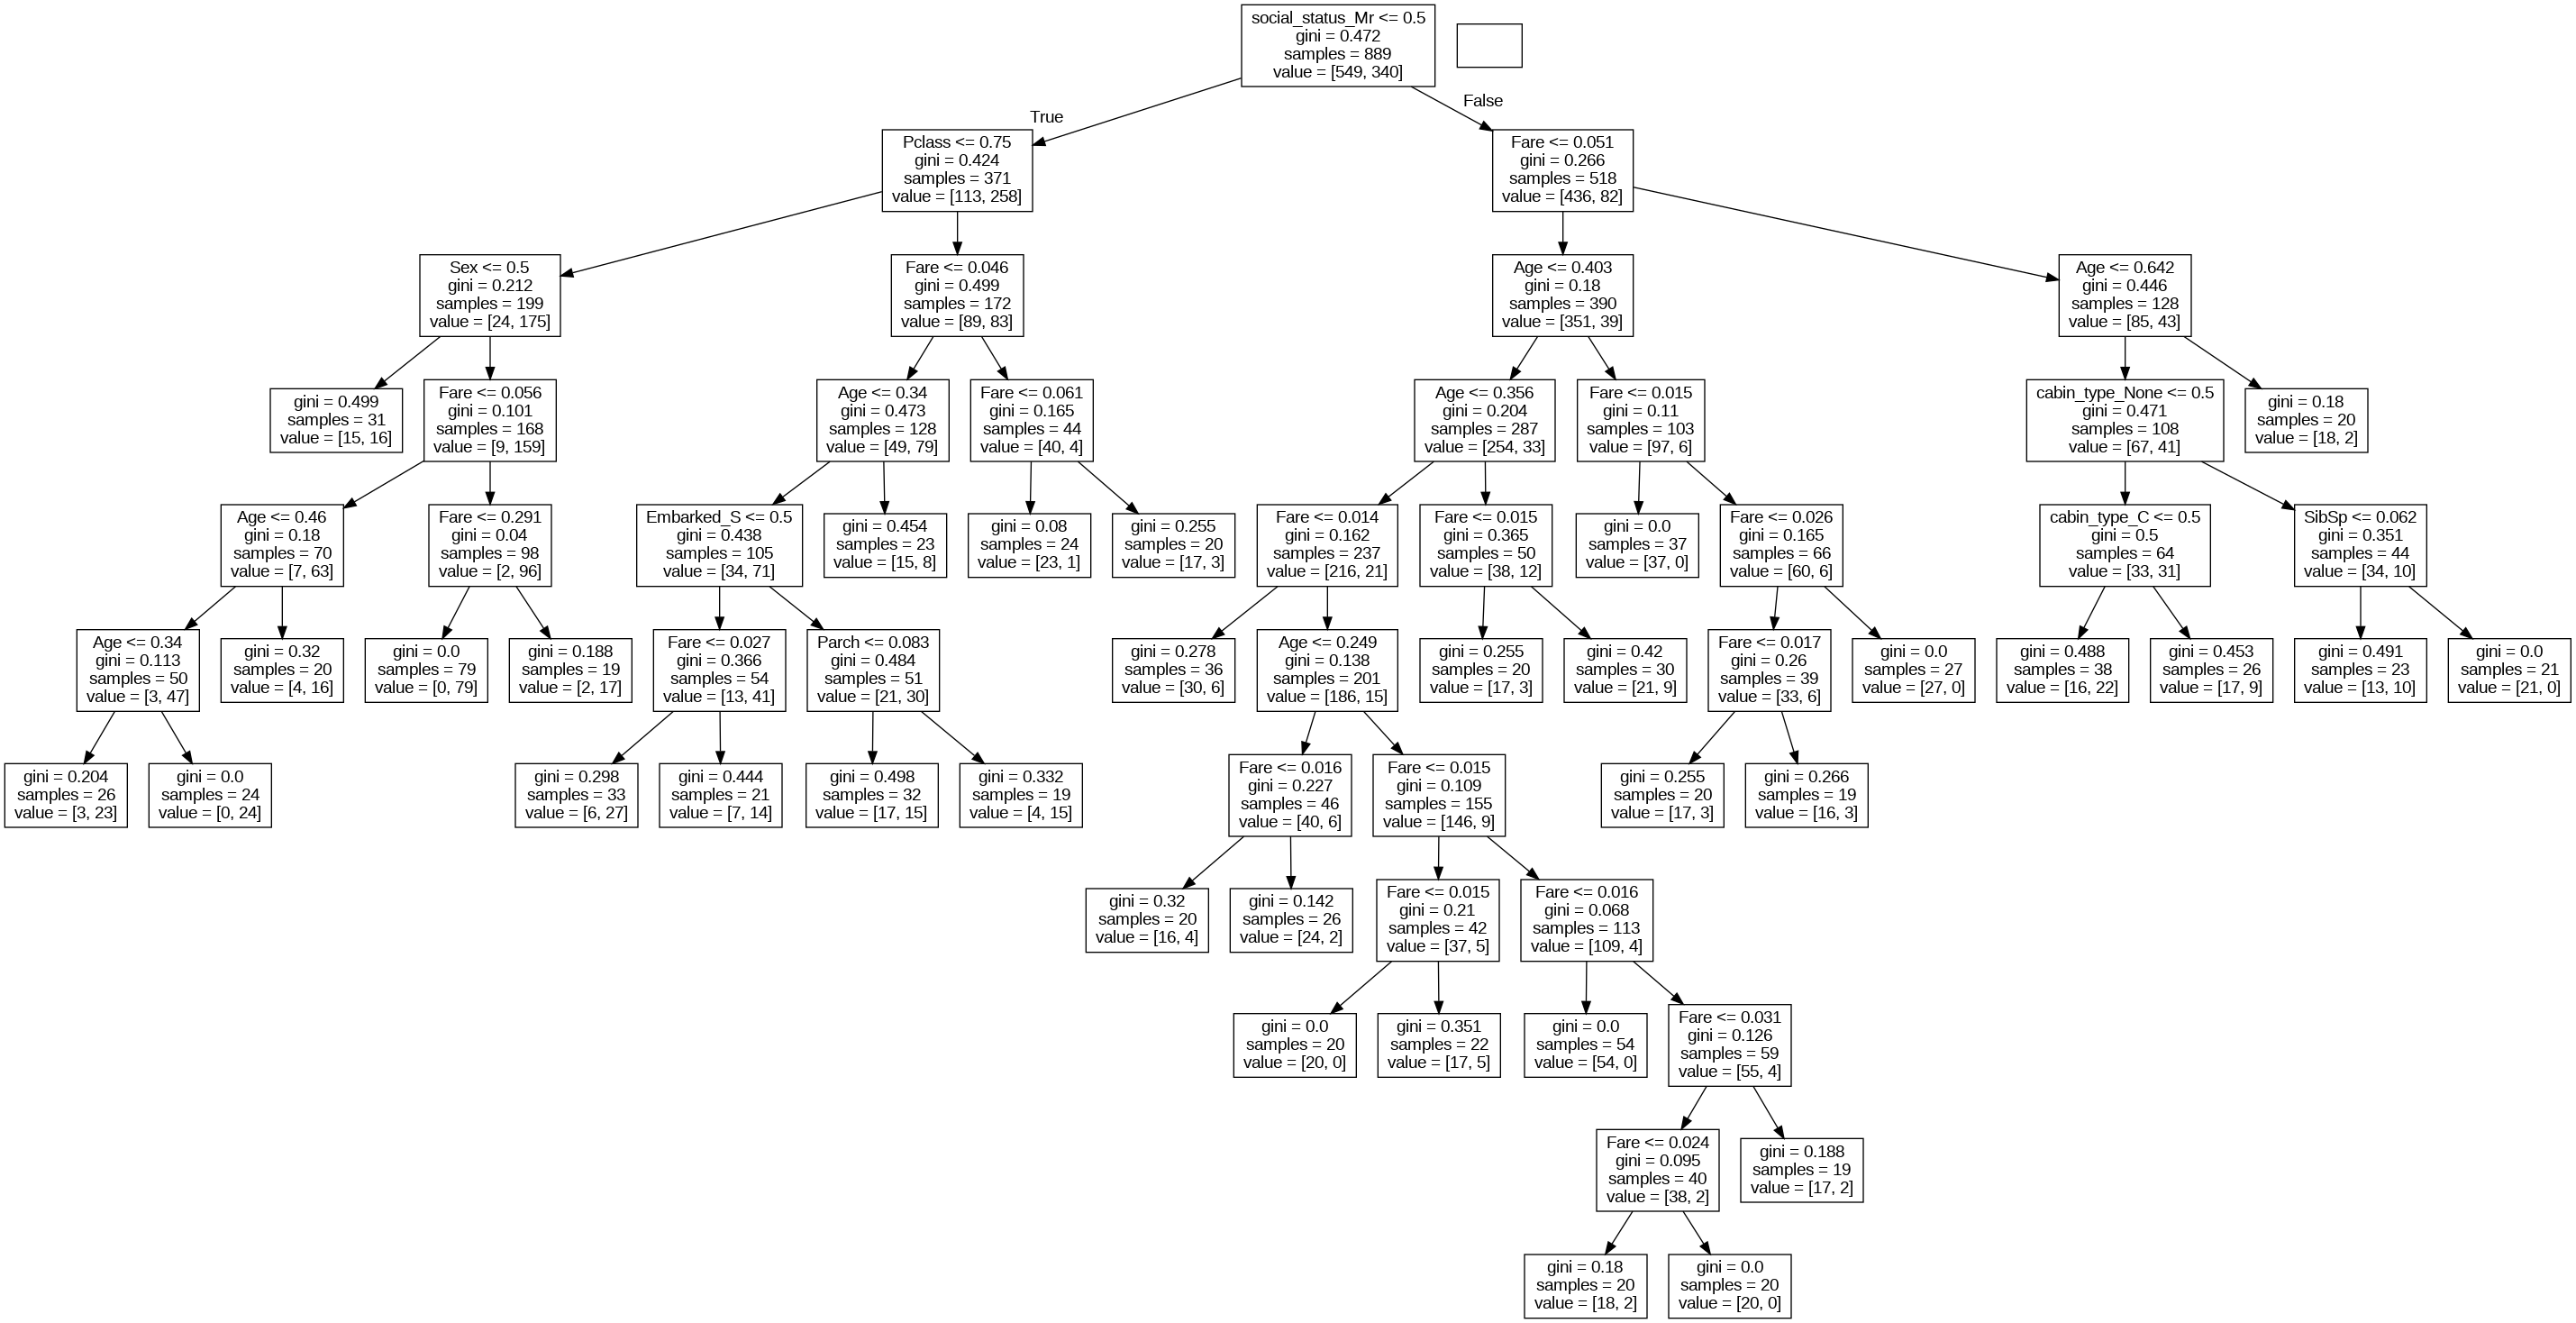

In [56]:
import pydotplus
from six import StringIO
from sklearn import tree

column_names = X_df.columns

dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=column_names)
graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("titanic.png")
from IPython.core.display import Image
Image(filename='titanic.png')

의사결정트리
* 해석에 대해 직관적임
* 어떤 속성이 분류에 큰 영향을 주는가

성능은 딥러닝이 더 좋지만 딥러닝은 이게 왜 잘나오는지 모름(블랙박스 느낌) <br>
반면 의사결정트리는 이유가 있음